# Deliverable 2

In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# Visit the Mars Temperature Data site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

# Parse the HTML
html = browser.html
mars_soup = soup(html, 'html.parser')

In [5]:
# Find the table
table = mars_soup.find('table', class_='table')
print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [6]:
# Store table data in Python structure
mars_table = []
html = browser.html
mars_soup = soup(html, 'html.parser')
rows = table.find_all('tr', class_='data-row')
for row in rows:    
    table_cell = row.find_all('td')
    row = [col.text for col in table_cell]
    mars_table.append(row)


In [7]:
# View scraped data
mars_table

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Convert to Pandas DataFrame
mars_df = pd.DataFrame(mars_table, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
# Examine data types
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Convert data types
mars_df.sol = mars_df.sol.astype(int)
mars_df.ls = mars_df.ls.astype(int)
mars_df.month = mars_df.month.astype(int)
mars_df.min_temp = mars_df.min_temp.astype(float)
mars_df.pressure = mars_df.pressure.astype(float)

In [11]:
# Convert date to datetime
mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date)

In [12]:
# View data types
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


In [13]:
# Answer the following question: How many months exist on Mars?
mars_df["month"].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [14]:
# Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_df["sol"].nunique()

1867

In [15]:
# Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)?
avg_temp_by_month = mars_df.groupby(['month']).mean()
avg_temp_by_month.loc[:, ['min_temp']]

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


In [16]:
# What is the coldest month on Mars?
# Month 3
min(avg_temp_by_month["min_temp"])

-83.30729166666667

In [17]:
# What is the warmest month on Mars?
# Month 8
max(avg_temp_by_month["min_temp"])

-68.38297872340425

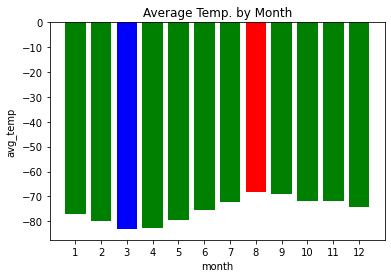

In [18]:
# Plot the results as a bar chart, color code the hottest and coldest months.
col = []
for val in avg_temp_by_month["min_temp"]:
    if val <= min(avg_temp_by_month["min_temp"]):
        col.append('blue')
    elif val >= max(avg_temp_by_month["min_temp"]):
        col.append('red')
    else:
        col.append('green')
plt.bar(avg_temp_by_month.index, avg_temp_by_month["min_temp"], color=col)
# Create labels for the x and y axes.
plt.xlabel("month")
plt.xticks(avg_temp_by_month.index)
plt.ylabel("avg_temp")
# Create a title.
plt.title("Average Temp. by Month")
plt.savefig("Images/avg_temp_by_month.png")
plt.show()

In [19]:
# Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars?
avg_pressure_by_month = mars_df.groupby(['month']).mean()
avg_pressure_by_month.loc[:, ['pressure']]

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [20]:
# What month has the lowest atmospheric pressure?
# Month 6
min_pres = min(avg_pressure_by_month["pressure"])
print(min_pres)

745.0544217687075


In [21]:
# What month has the highest atmospheric pressure?
# Month 9
max_pres = max(avg_pressure_by_month["pressure"])
print(max_pres)

913.3059701492538


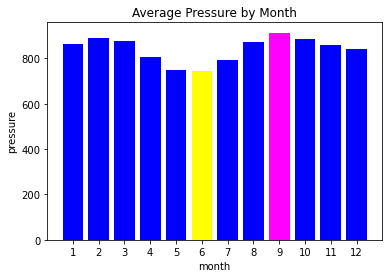

In [22]:
# Plot the results as a bar chart, and color code the lowest and highest pressure months.
col = []
for val in avg_pressure_by_month["pressure"]:
    if val <= min_pres:
        col.append('yellow')
    elif val >= max_pres:
        col.append('magenta')
    else:
        col.append('blue')
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month["pressure"], color=col)
# Create labels for the x and y axes.
plt.xlabel("month")
plt.xticks(avg_pressure_by_month.index)
plt.ylabel("pressure")
# Create a title.
plt.title("Average Pressure by Month")
plt.savefig("Images/avg_pressure_by_month.png")
plt.show()

In [23]:
# Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
min_temp_by_day = mars_df.groupby(['sol']).min()
min_temp_by_day.loc[:, ['min_temp']]

,min_temp
sol,
10,-75.0
11,-76.0
12,-76.0
13,-74.0
14,-74.0
...,...
1973,-78.0
1974,-77.0
1975,-76.0


In [24]:
# About how many terrestrial (Earth) days exist in a Martian year?
# Credit: Isabel Garrido
from datetime import date
first_ls_date = date(2013, 8, 1)
last_ls_date = date(2015, 6, 18)
delta = last_ls_date - first_ls_date
print(delta.days)

686


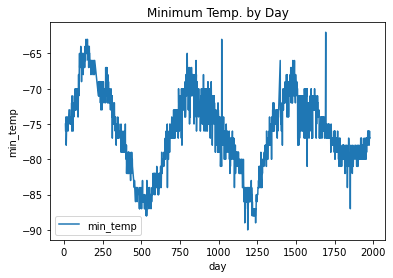

In [25]:
# Plot the results of temperature by day.
daily_temp = min_temp_by_day.loc[:, ['min_temp']].plot()
# Create labels for the x and y axes.
plt.xlabel("day")
plt.ylabel("min_temp")
# Create a title.
plt.title("Minimum Temp. by Day")
plt.savefig("Images/minimum_temp_by_day.png")
plt.show()

In [26]:
# Export mars_df to CSV file
mars_df.to_csv("Results/mars_data_deliverable_2.csv", index=False, encoding='utf8')

In [27]:
browser.quit()